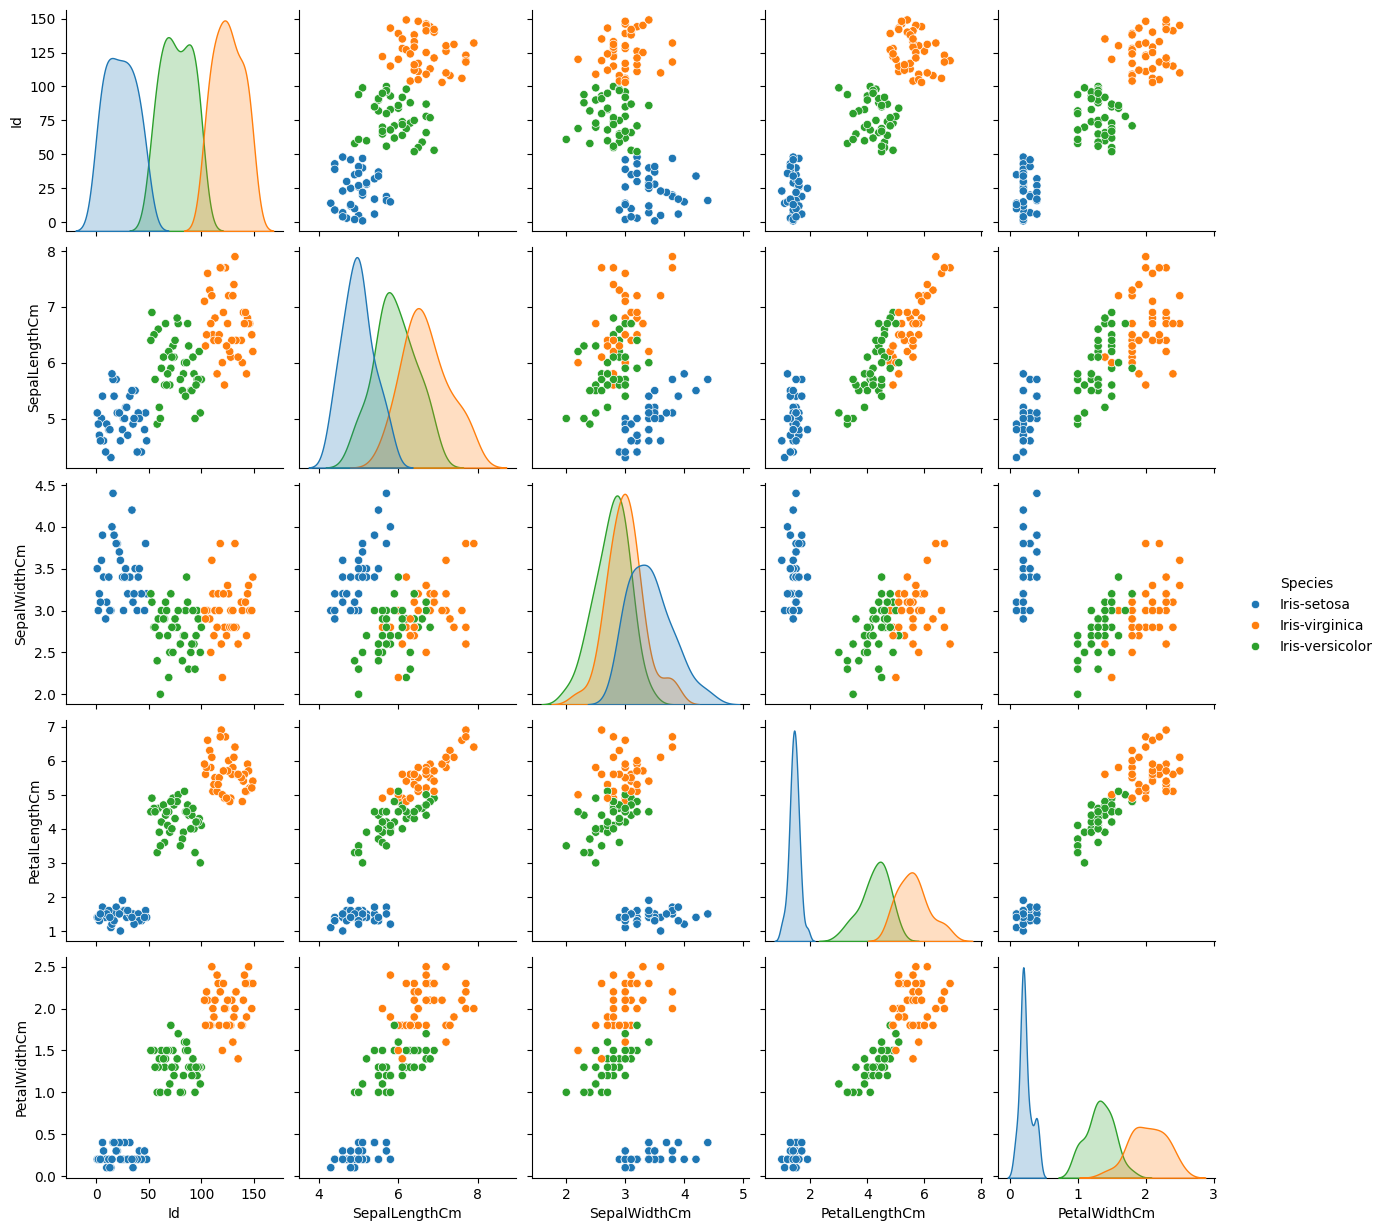

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
iris=pd.read_csv('iris.csv')
train,test=train_test_split(iris, test_size=0.2)

#making a copy without labels(species)
train_data=train.iloc[:, 0:4].values
test_data=test.iloc[:, 0:4].values

# CSV format :->
# Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
# 1,5.1,3.5,1.4,0.2,Iris-setosa
# 2,4.9,3.0,1.4,0.2,Iris-setosa
# 3,4.7,3.2,1.3,0.2,Iris-setosa
# 4,4.6,3.1,1.5,0.2,Iris-setosa
# 5,5.0,3.6,1.4,0.2,Iris-setosa
# 6,5.4,3.9,1.7,0.4,Iris-setosa
# 7,4.6,3.4,1.4,0.3,Iris-setosa

import seaborn as sns

#plotting the data
sns.pairplot(train, hue='Species')


Implement the K-means clustering algorithm (without using any in-built library
function) on the IRIS dataset (without considering the label-column). Report the
sum-square-error (SSE), silhouette coefficient, and the number of iterations required
for convergence (for different K values).

In [42]:
import matplotlib.pyplot as plt

X=iris.iloc[:, 1:5].values # removing id and species columns

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def kmeans(X, k, max_iters=100):
    centroids=X[np.random.choice(X.shape[0], k, replace=False)]
    #print(centroids)
    
    for _ in range(max_iters):
        clusters=[[] for _ in range(k)]
        for point in X:
            distances=[euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx=np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        new_centroids=[np.mean(cluster, axis=0) for cluster in clusters]
        
        if np.all([np.allclose(centroids[i], new_centroids[i]) for i in range(k)]):
            break
        
        centroids=new_centroids
    
    return centroids, clusters

def calculate_sse(centroids, clusters):
    sse=0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i])**2
    return sse

def run_kmeans_analysis(funcc,X, k_values):
    results=[]
    for k in k_values:
        centroids, clusters=funcc(X, k)
        sse=calculate_sse(centroids, clusters)
        
        #prepare data for silhoutte score calculation
        labels=np.zeros(X.shape[0])
        for i, cluster in enumerate(clusters):
            for point in cluster:
                labels[np.where((X == point).all(axis=1))[0][0]]=i
        
        silhouette=silhouette_score(X, labels)
        
        results.append({
            'k': k,
            'sse': sse,
            'silhouette': silhouette
        })
    
    return results

k_values=range(2, 11)
results=run_kmeans_analysis(kmeans,X, k_values)

for result in results:
    print(f"K: {result['k']}")
    print(f"SSE: {result['sse']:.2f}")
    print(f"Silhouette Coefficient: {result['silhouette']:.4f}")
    print()

K: 2
SSE: 152.37
Silhouette Coefficient: 0.6480

K: 3
SSE: 78.95
Silhouette Coefficient: 0.5379

K: 4
SSE: 71.66
Silhouette Coefficient: 0.3698

K: 5
SSE: 49.87
Silhouette Coefficient: 0.3282

K: 6
SSE: 45.80
Silhouette Coefficient: 0.3223

K: 7
SSE: 37.52
Silhouette Coefficient: 0.2835

K: 8
SSE: 42.02
Silhouette Coefficient: 0.2444

K: 9
SSE: 27.96
Silhouette Coefficient: 0.2998

K: 10
SSE: 33.67
Silhouette Coefficient: 0.3644



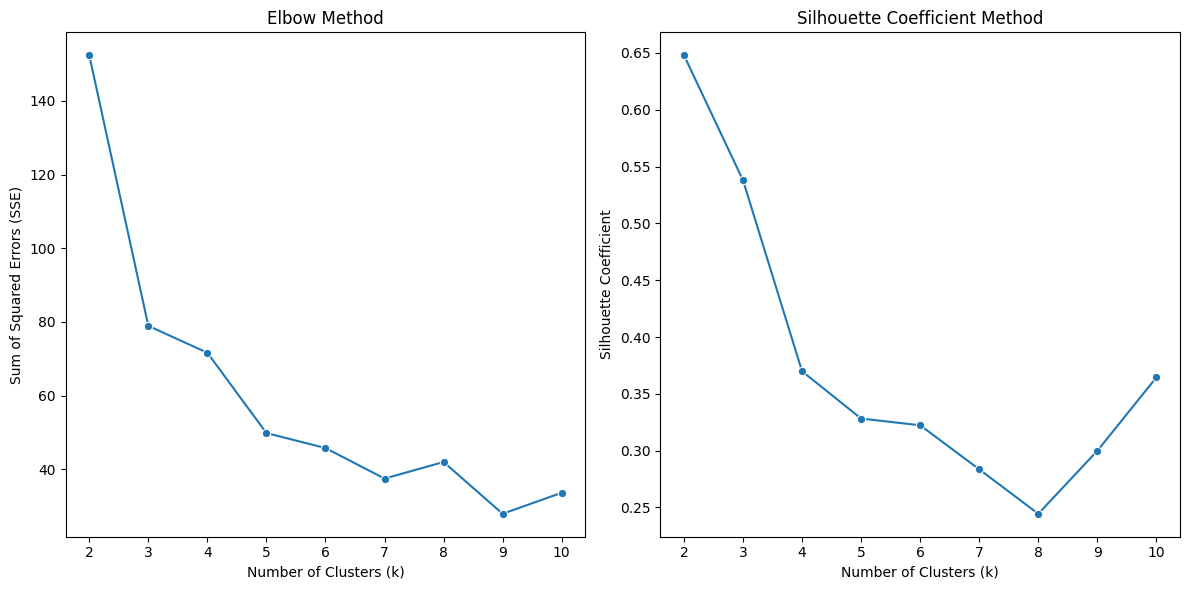

In [43]:
# Convert results to a DataFrame for easier plotting
results_df=pd.DataFrame(results)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a line plot for SSE
plt.subplot(1, 2, 1)
sns.lineplot(x='k', y='sse', data=results_df, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

# Create a line plot for Silhouette Coefficient
plt.subplot(1, 2, 2)
sns.lineplot(x='k', y='silhouette', data=results_df, marker='o')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


PART B

In [44]:
def kmeans_fixedK_with_labels(X, max_iters=100):
    #choose k equal to no . of species in iris
    k=np.unique(iris['Species']).shape[0]
    #now choose k points from each species
    centroids=[]
    for species in np.unique(iris['Species']):
        species_data=iris[iris['Species']==species].iloc[:, 1:5].values
        species_centroid=species_data[np.random.choice(species_data.shape[0], 1, replace=False)]
        centroids.append(species_centroid)
    centroids=np.concatenate(centroids)
    
    for _ in range(max_iters):
        clusters=[[] for _ in range(k)]
        for point in X:
            distances=[euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx=np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        new_centroids=[np.mean(cluster, axis=0) for cluster in clusters]
        
        if np.all([np.allclose(centroids[i], new_centroids[i]) for i in range(k)]):
            break

        centroids=new_centroids

    return centroids, clusters




k_values2=[3]
results2=run_kmeans_analysis(kmeans_fixedK_with_labels,X, k_values2)
centres,points=kmeans_fixedK_with_labels(X)
#save this to csv file in same format as iris.csv
# Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species

for result in results2:
    print(f"K: {result['k']}")
    print(f"SSE: {result['sse']:.2f}")
    print(f"Silhouette Coefficient: {result['silhouette']:.4f}")
    print()





K: 3
SSE: 82.63
Silhouette Coefficient: 0.5104



### PART C

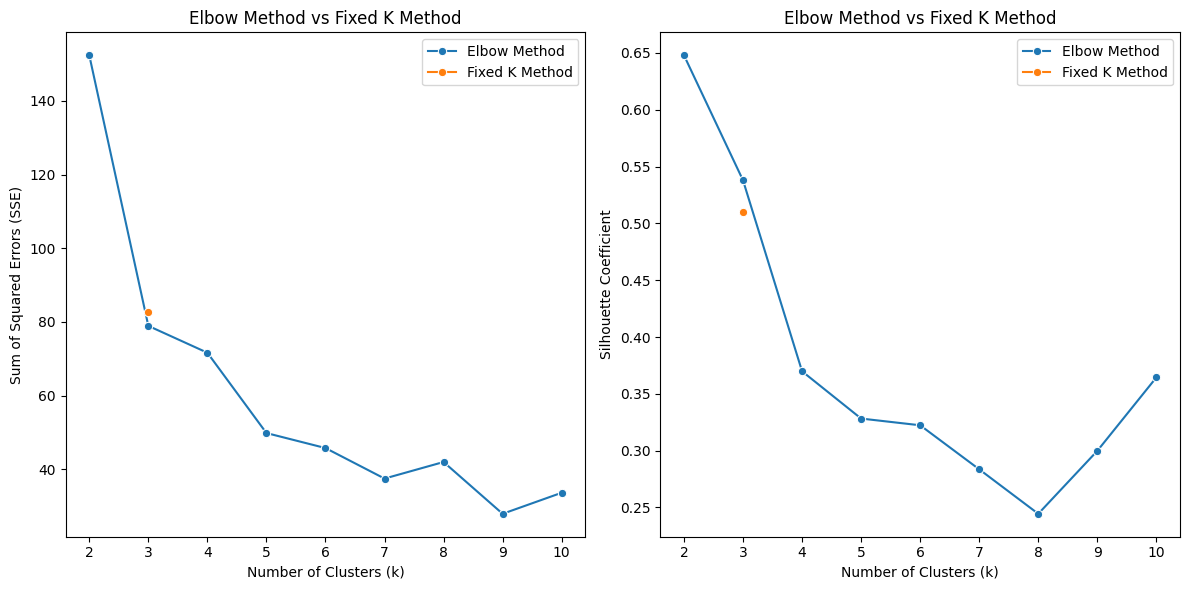

In [45]:
#compare the results for k = 3 for both methods

results_df2=pd.DataFrame(results2)

# fig setting
plt.figure(figsize=(12, 6))

# ss plot
plt.subplot(1, 2, 1)

sns.lineplot(x='k', y='sse', data=results_df, marker='o', label='Elbow Method')
sns.lineplot(x='k', y='sse', data=results_df2, marker='o', label='Fixed K Method')

plt.title('Elbow Method vs Fixed K Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend()

# silhouette plot
plt.subplot(1, 2, 2)

sns.lineplot(x='k', y='silhouette', data=results_df, marker='o', label='Elbow Method')
sns.lineplot(x='k', y='silhouette', data=results_df2, marker='o', label='Fixed K Method')

plt.title('Elbow Method vs Fixed K Method')

plt.xlabel('Number of Clusters (k)')

plt.ylabel('Silhouette Coefficient')


plt.legend()

# fitting the layout and displaying the plot
plt.tight_layout()

plt.show()


## we can see that the silhouette score for k=3, (which is actual variety of labels)
## is good enough compared to others K values, (despite k=2 gives bestter s score , its not the actually category count,(which is 3))